> ### EEE3314-02: Introduction to Artificial Intelligence

# Assignment \# III: Logistic Regression

<div style="text-align: right"> **Due date: Nov. 2, 2018.** </div> 
<div style="text-align: right"> **Please upload your file @ yscec by 9 PM.** </div> 
<h4><div style="text-align: right"> **For one day late (70% credit), please send your file to your TAs in the form of [ID_Name_HW3.ipynb].**</div> </h4>
<div style="text-align: right"> Beomjun Kim(김범준): <a href="mailto:beomjun.kim@yonsei.ac.kr">beomjun.kim@yonsei.ac.kr</a> </div>
<div style="text-align: right"> Chanho Um(엄찬호): <a href="mailto:chanho0103@yonsei.ac.kr">chanho0103@yonsei.ac.kr</a> </div>

### *Assignement Instructions:*
- Write a program implementing a particular algorithm to solve a given problem.   
- <h4><span style="color:red">**Report and discuss your results. Analyze the algorithm, theoretically and empirically. **</span> </h4>

### *Collaboration policy:*
- You may discuss the questions.   
- Each student writes their own answers.   
- **Write on your homework anyone with whom you collaborate.**   
- Each student must write their own code for the programming part (**if not you will get a F grade**).

<h2><span style="color:blue">[2016142072] [NamGilHyun]</span> </h2>

In [ ]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

## Problem description

We will implement Stochastic Gradient Descent (SGD) to optimize a logistic regression model to predict whether a given patient have diabetes or not. In clinical informatics, machine learning approahces have been widely adopted to predict clinically adverse events based on patient data. For this problem, we will use the Pima Indians Diabetes Data Set. The data on each patient include:

- $\texttt{label}$: The output class variable (0 - normal or 1 - diabetes)  
- $\texttt{num_preg}$: Number of times pregnant 
- $\texttt{PGC}$: Plasma glucose concentration at 2 hours in an oral glucose tolerance test (PGC)
- $\texttt{DBP}$: Diastolic blood pressure (DBP)
- $\texttt{tricept}$: Triceps skin fold thickness (tricept, unit: mm)  
- $\texttt{insulin}$: 2-Hour serum insulin (insulin, unit: μU/ml)
- $\texttt{BMI}$: Body mass index (BMI)
- $\texttt{ped_func}$: Diabetes pedigree function
- $\texttt{age}$: Age (age, years)

Among all 768 patients, we will separate 500 patients as training data ($\texttt{logistic_regression_training_data.csv}$) and 268 patients as test data ($\texttt{logistic_regression_test_data.csv}$).

### I. Logistic regression method using SGD
(*50 points*) P1.1 Implement a logistic regression method using SGD. You may assume that the data is randomly ordered. 

(*10 points*) P1.2 Plot $\bar L$ every 100 iterations, e.g., [100, 200, 300,...], defined as

$\begin{equation} \bar L(T) = \frac{1}{T}\sum_{t=1}^{T} (\hat y^t - y^t)^2 \end{equation}$,   
where $T$ is the number of iterations and $\hat y^t$ (either 0 or 1) is the predicted label for sample $\bf{x}^t$ using the weights $\bf{w}^{t-1}$. 

> Initialize the weight vector $w$ and the bias $w_0$ to 0.    
> Learning rate = 0.8.    
> Number of iterations = 100,000.

(*10 points*) P1.3 Use the model weights to predict whether each patient in the test set has diabetes, for every 100 steps. Plot sum of squared errors of your prediction.

### II. Model evaluation and feature interpretations 
(*10 points*) P2.1 Using the model after 100,000 iterations, measure test accuracy. Accuracy is the fraction of predictions our model got right. That is, it is computed by Number of correct predictions / Total number of predictions.

(*10 points*) P2.2 SGD oscillates around a solution (noisy convergence). In order to minimize risk of picking bad weights, we typically use an average model. Measure test accuracy again, using an average model over the weights for the last 1000 iterations

(*10 points*) P2.3 Report the weights of following features, $\texttt{BMI}$, $\texttt{insulin}$, and $\texttt{PGC}$, and provide an interpretation of the effect of these features for diabetes classification based on the inferred weights.

**P1.1**

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
# Data load
data = pd.read_csv('logistic_regression_training_data.csv') 
test_data = pd.read_csv('logistic_regression_testing_data.csv')
data.head()


,label,num_preg,PGC,DBP,tricept,insulin,BMI,ped_func,age
0,1,0.470588,0.758794,0.639344,0.507937,0.35,0.639344,0.187020,0.250000
1,1,0.235294,0.663317,0.000000,0.000000,0.00,0.490313,0.095645,0.033333
2,0,0.058824,0.467337,0.459016,0.174603,0.00,0.335320,0.144748,0.016667
3,0,0.058824,0.547739,0.311475,0.285714,0.20,0.344262,0.140478,0.083333
4,1,0.176471,0.869347,0.688525,0.523810,0.79,0.532042,0.076857,0.016667


dataframe객체의 head함수를 이용해서 처음 5개의 데이터들을 살펴보았다. 그 결과 총 8개의 feature가 있고, feature value들은 0부터 1사이의 값으로 정규화되어있음을 확인할 수 있었다. 또한 위의 문제 설명에 나와있다시피 label 이 0이면 정상, label이 1이면 당뇨병을 가지고 있음을 나타냄을 확인할 수 있다. 

In [169]:
# Plot statistical Infomation.
data.describe()

,label,num_preg,PGC,DBP,tricept,insulin,BMI,ped_func,age
count,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.34600,0.216471,0.610261,0.561934,0.311048,0.125230,0.475377,0.172000,0.192167
std,0.47617,0.192480,0.158489,0.166278,0.248020,0.170124,0.118355,0.144031,0.188961
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.058824,0.497487,0.508197,0.000000,0.000000,0.400522,0.072054,0.050000
50%,0.00000,0.176471,0.587940,0.590164,0.349206,0.056667,0.476900,0.122758,0.116667
75%,1.00000,0.352941,0.708543,0.655738,0.507937,0.208750,0.548435,0.246904,0.287500
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


dataframe객체의 describe 함수를 이용해서 training set의  데이터들에 대한 대략적인 통계 정보들을 확인하였다.
문제에 나와있다 시피 training dataset의 data point 개수는 500개 였으며 각 feature들의 평균값 25%,50%,75% 값들을 통해 특정 데이터가 상대적으로 어느 위치에 있는지 확인할 수 있었다.

In [174]:
data_np = data.values  # Change dataframe object to numpy array
test_data_np = test_data.values

y = data_np[:,0] # Data preprocessing
X = data_np[:,1:]
y_t = test_data_np[:,0]
X_t = test_data_np[:,1:]
N = len(data['label'].values)
N_t = len(test_data['label'].values)
X2 = np.c_[np.ones(N), X] # Consider Intercept term 
X2_t = np.c_[np.ones(N_t), X_t]

w_init = np.zeros(len(X[0,:]))


def sigmoid(x): # Implementing sigmoid function

        return 1/(1 + math.exp(-x))

def sign(x): # Implementing Labeling function
    if x>=0.5:
        return 1
    else:
        return 0

def error_calculate(X, y, w): # Implementing error calculation function
    y_p = np.zeros(X.shape[0])
    sum_error=0
    for i in range(X.shape[0]):
        y_p[i] = sign(sigmoid(np.dot(X[i,:],w)))
        error = y_p[i] -  y[i]
        sum_error += error**2 
    
    return sum_error /X.shape[0]

데이터들을 처리하기 위해 넘파이 어레이 형태로 바꿔주었고, 종속변수와 독립변수 부분을 분리하였다. 또한 문제 1번과 2번을 해결하는 데에 필요한 함수들을 만들었다. sigmoid함수는 확률값을 계산하는 데에 사용하고, sign함수는 확률값이 0.5보다 크면 y를 1로 판정하고 그렇지 않으면 y를 0으로 판정하는 함수이다. 또한 error_calculate함수는 데이터셋과 w를 받아서 Average sum of squared에러를 계산해서 반환하는 함수이다.

In [163]:
def logis_sgd(X, y, X_t, y_t, w, etha, iterations):
    
    # Initialize value
    whist=[]
    error_history = []
    rss =[]
    p = np.zeros(len(w))
    y_p = np.zeros(X.shape[0])
    sum_error = 0
    t=0
    
    while(t < iterations):
        
        for i in range(X.shape[0]):
            
            m= y[i]-sigmoid(np.dot(X[i,:],w))
            for j in range(len(w)): # Updating w
            
                p[j] = X[i,j]*m
                w[j] = w[j] + (etha*p[j])
                
            
            whist.append(w.copy())  # Saving w values
            y_p[i] = sign(sigmoid(np.dot(X[i,:],w))) # Calculating error
            error = y_p[i] -  y[i]
            sum_error += error**2
            
            if t!=0 and t%100==0:
                error_history.append(sum_error/t)
                rss.append(error_calculate(X_t,y_t,w)) # Saving test error 
            
            
            t = t+1
            

    return  error_history,whist,rss

Stochastic gradient ascent for logistic regression을 위의 Logis_sgd 함수를 만들어서 구현하였다.
기존 gradient ascent의 경우
\\(\frac { \partial ll(w) }{ \partial { w }_{ j } } =\sum _{ i=1 }^{ N }{ \frac { \partial l{ l }_{ i }(w) }{ \partial { w }_{ j } }  } \quad \\) 이지만

stochastic gradient ascent 의 경우
\\(\frac { \partial ll(w) }{ \partial { w }_{ j } } =\frac { \partial l{ l }_{ i }(w) }{ \partial { w }_{ j } } \\) 이다.
여기서 ll(w)는 log - likelihood function이다. 
iteration 마다 각각 다른 data point i를 사용하는 것이 특징이다. 여기서는 문제에서 데이터가 무작위로 정렬되있다고 하였으므로 순차적으로 해도 무관하기 때문에 그렇게 구현하였다. 또한 iteration 마다 w를 업데이트 하며 한 iteraion에서 데이터 포인트 하나를 가지고 w를 업데이트 한다. 

구체적으로는 j번째 feature value를 업데이트 할 때는 다음과 같은 과정을 거친다.

\\({ w }_{ j }^{ (t+1) }={ w }_{ j }^{ (t) }+\eta ({ h }_{ j }({ x }_{ i })(indic({ y }_{ i }=1)-P(y=1|{ x }_{ i },{ w }^{ (t) })))\\)

여기서 t는 iteration 이며 indic()은 indicator function 이다. 에타는 learning rate값을 의미한다.  조건부 확률 값은 Sigmoid 함수에 Score value를 넣었을 때 나오는 함숫값으로 구한다.


추가적으로 Logis_sgd에서는 문제 1.2와 1.3에서 iteration마다 error를 계산해야 해서 Logistic regression SGD를 구현함과 동시에 error를 계산해서 iteration 100번마다 error를 저장하게 하였고, 문제2.2에서 편하게 평균 test error를 계산하기 위해 test error도 iteration 100번마다 저장하였다. 또한 2번에서의 편의를 위해 iteration마다 갱신되는 w값들을 저장한 리스트인 whist를 반환하게 하였다.

In [175]:
errhist,whist,rss = logis_sgd(X,y,X_t,y_t,w_init,0.8,100000)

**P1.2**

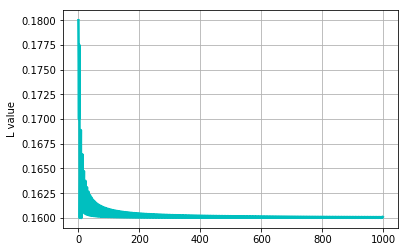

In [176]:
x1 = range(0,len(errhist))
y1 = [errhist[v] for v in x1]

# Plot the graph
plt.plot(x1,y1,'c-',lw=2.5)

plt.ylabel('L value')
plt.grid(True)
plt.show()


에러를 계산할 때는 각 데이터 포인트마다 예측된 라벨과 진짜 라벨값의 차이를 제곱한것들을 더해서 구한다. 예측되는 라벨값은 sigmoid함숫값이 0.5보다 크면 1, 0.5보다 작으면 0 으로 판정하는 sign함수를 활용하여 구하였다.
100000번의 iteration을 수행하면서 100번마다 그때까지의 누적 평균 Loss를 저장해둔 Logis_sgd함수에서 반환한 errhist를 가지고 plot하였다.
따라서 1000개의 값이 있고 이때의 x축 값들은 iteration 수가 아니라 iteration 수를 100으로 나눈 값이다.
위의 표에서 보듯이 누적 평균 loss가 급격하게 감소함을 확인할 수 있고, iteration초기에는 진동폭이 크지만 iteration횟수가 증가할수록 진동폭이 감소함을 확인할 수 있다.

**P1.3**

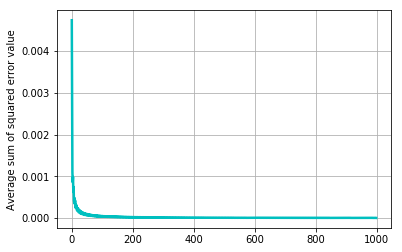

In [178]:
x3 = range(0,len(rss))
y3 = [rss[v] for v in x3]

# Plot the graph
plt.plot(x3,y3,'c-',lw=2.5)

plt.ylabel('Average sum of squared error value')
plt.grid(True)
plt.show()


문제 1.3에서는 training set에서 100,200,...번째 iteration 마다의 w값을 추출하여 이 w값을 이용하여 test data set에 대해 예측치를 구하고 이 예측치와 테스트 데이터의 참값과의 차이를 통해 average sum of squared error를 구했다. 이는 Logis_sgd 함수에서 iteration이 100번째마다의 w를 error_calculate함수의 인자로 넣어서 test data에 대한 error를 rss라는 리스트에 넣어서 반환하였다. 
이후 이를 plot한 위의 결과를 보면 iteration이 증가할수록 평균 sum of squared값이 급격하게 감소함을 확인할 수 있다. 

**P2.1**

In [144]:
def cal_accuracy(X,y,w):
    cnt = 0
    y_p = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        y_p[i] = sign(sigmoid(np.dot(X[i,:],w)))
        if y[i] == y_p[i]:
            cnt += 1
    
    return cnt/X.shape[0]

In [145]:
test_accuracy = cal_accuracy(X_t,y_t,whist[-1])

In [146]:
test_accuracy

0.5634328358208955

1.1의 Logis_sgd함수를 보면 마지막에 iteration마다 저장한 w들을 반환함을 확인할 수 있다. 그래서 총 10만개의 w값이 저장된 리스트인 whist의 마지막 w값을 모델 정확도를 판별하는데 사용한다. 정확도는 전체 데이터 포인트 개수에서 예측치와 참값이 일치하는 데이터 포인트 개수의 비율로 정의되므로 가중치 w와 test 데이터셋의 독립변수값과 종속변수값들을 인자로 받는 cal_accuracy 함수를 구현하여 예측치와 참값이 같은 데이터 포인트의 개수를 세서 전체 데이터 포인트 개수로 나눈 accuracy를 반환하였다. 그 결과 테스트 정확도가 약 0.56이 나왔다. 이는 모델이 너무 단순하고 w값이 계속 진동하는 것 때문에 나타난 결과로 보인다. 또한 데이터셋에 대한 자세한 정보가 없지만 직접 데이터들을 살펴본 결과 데이터들의 feature value가 0인 부분이 군데군데 있었다. 나이 같은 0일 수가 없는 수치까지도 0인 항목들이 조금 있었다. 

**P2.2**

In [156]:
def avg_w(w_hist):
    sum_w = np.zeros(8)
    for i in range(99000,100000):
        sum_w += whist[i]
    return sum_w/1000

In [157]:
avg_w = avg_w(whist)

In [159]:
test_accuracy2 = cal_accuracy(X_t,y_t,avg_w)

In [160]:
test_accuracy2

0.667910447761194

2.2에서는 총 십만번의 iteration 중 마지막 1000개의 가중치들의 평균을 사용하여 정확도를 측정한다. 십만개의w값들이 저장되어있는 whist를 인자로 받는 avg_w라는 함수를 구현하여 99000번째부터 99999번째까지의 가중치들의 평균 가중치를 반환하게 하였다. 이 평균 가중치를 사용하여 테스트 데이터셋에 대해 정확도를 측정한 결과 2.1에서의 결과인 56%보다 거의 10%나 향상된 약 67%의 정확도가 나타났다. 이 결과를 봤을 때, 가중치들의 진동폭의 영향이 어느 정도 있고, 이는 평균 가중치를 사용하면 영향을 상쇄시켜서 정확도를 눈에 띄게 향상시킬 수 있음을 알 수 있다.

**P2.3**

In [161]:
print('weight for BMI: {0}, weight for Insulin: {1}, weight for PGC: {2} '.format(avg_w[5],avg_w[4],avg_w[1]))

weight for BMI: -1.3059873054861209, weight for Insulin: 1.1216882849050351, weight for PGC: 2.1600140285727547 


보다 정확한 accuracy를 보였던 문제2.2에서 계산한 평균 w값을 사용하였다. 
BMI와 Insulin, PGC에 대한 가중치를 살펴 본 결과, 세 항목 중 가장 당뇨병 발병 여부에 영향을 크게 끼치는 항목은 가장 절댓값이 높은 PGC라고 볼 수 있다. 또한 특정 항목에 해당하는 feature값의 부호가 '+'이고 크기가 클수록 score value가 커지고 score value가 커질수록 sigmoid fuction의 함숫값이 1에 가까워 지므로 당뇨병이라고 판정될 확률이 큰 것이다. 따라서 PGC 의 w는 약 2.16이므로 PGC가 클수록 당뇨병으로 판정될 확률이 높다고 생각할 수 있다. 반대로 weight 부호가 '-'일때는 그 반대 작용으로 정상이라고 판정될 확률이 커지는 것이다. 
